In [187]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()


import pandas as pd
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')


In [117]:
df_UK = df[df['job_country'] == 'United Kingdom']

In [129]:
df_skills = df_UK.explode('job_skills')

df_skills[['job_title', 'job_skills']]


,job_title,job_skills
15,Data Engineer,python
15,Data Engineer,sql
15,Data Engineer,power bi
45,Senior Data Analyst,sql
45,Senior Data Analyst,python
...,...,...
785642,Submission for the position: Data Engineer Sen...,qlik
785642,Submission for the position: Data Engineer Sen...,confluence
785642,Submission for the position: Data Engineer Sen...,jira
785676,Senior Data Scientist,r


In [130]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name ='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1163,sql,Data Engineer,7050
915,python,Data Engineer,6462
916,python,Data Scientist,6329
88,azure,Data Engineer,4865
1162,sql,Data Analyst,4467
...,...,...,...
1348,visio,Software Engineer,1
12,airtable,Data Engineer,1
10,airtable,Business Analyst,1
0,airflow,Business Analyst,1


In [131]:
job_titlles = df_skills_count['job_title_short'].unique().tolist()
job_titlles = sorted(job_titlles[:3])
job_titlles

['Data Analyst', 'Data Engineer', 'Data Scientist']

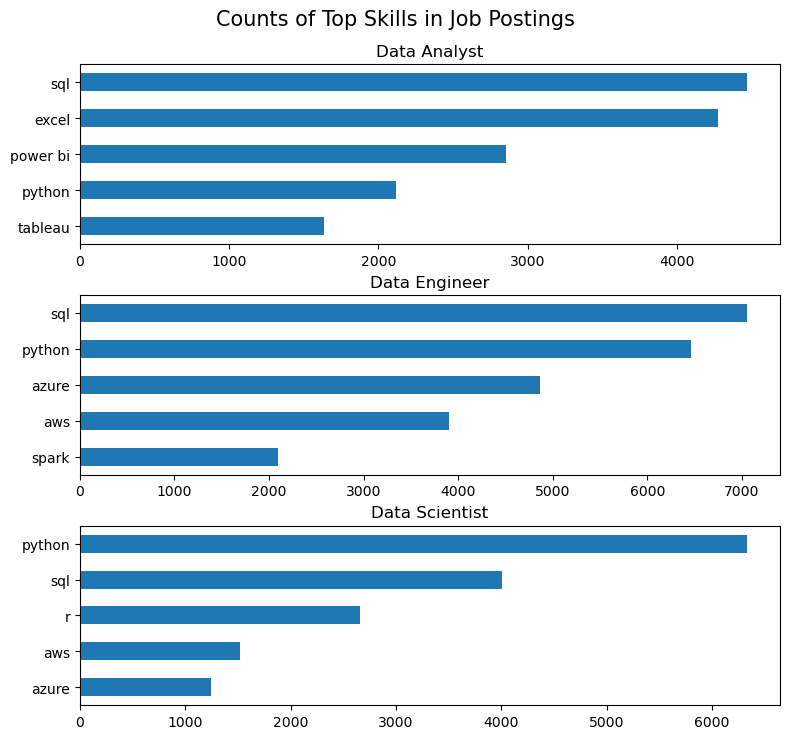

In [173]:
fig, ax = plt.subplots(len(job_titlles), 1, figsize=(8, 2.5*len(job_titlles)))

for i, job_title in enumerate(job_titlles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    
    df_plot.plot(kind='barh', x='job_skills',y='skill_count', ax=ax[i], legend=False, title=job_title)
    
    ax[i].invert_yaxis()        
    ax[i].set_ylabel('')        
    ax[i].set_xlabel('')  
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()


In [178]:
df_job_title_count = df_UK['job_title_short'].value_counts().reset_index(name='jobs_total')

In [181]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,7050,11807,59.710341
1,python,Data Engineer,6462,11807,54.730245
2,python,Data Scientist,6329,9148,69.184521
3,azure,Data Engineer,4865,11807,41.204370
4,sql,Data Analyst,4467,10482,42.615913
...,...,...,...,...,...
1414,visio,Software Engineer,1,541,0.184843
1415,airtable,Data Engineer,1,11807,0.008470
1416,airtable,Business Analyst,1,827,0.120919
1417,airflow,Business Analyst,1,827,0.120919


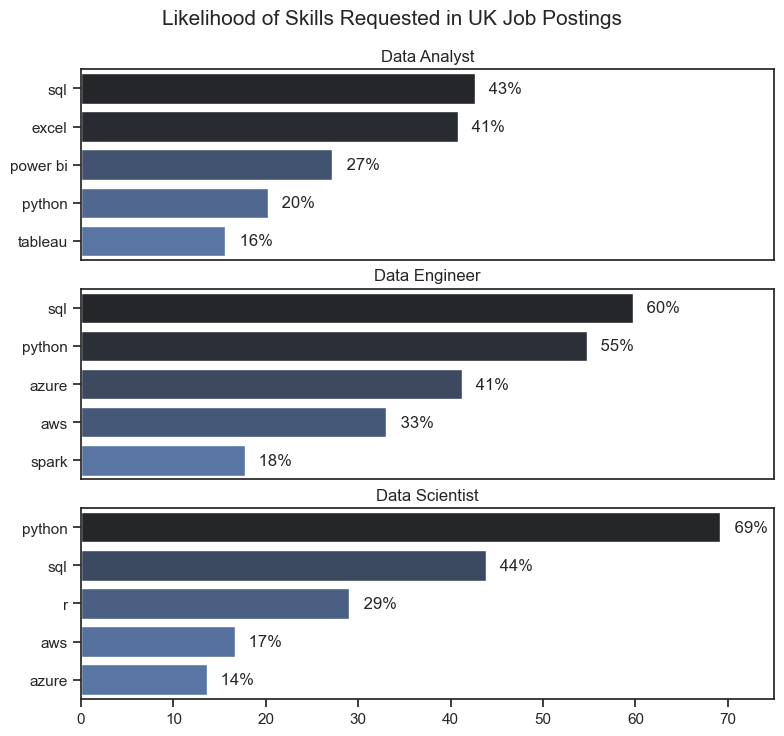

In [197]:
fig, ax = plt.subplots(len(job_titlles), 1, figsize=(8, 2.5*len(job_titlles)))

sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titlles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)       
    ax[i].set_ylabel('')        
    ax[i].set_xlabel('')  
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 75)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v +1, n, f'{v: .0f}%', va='center')

    if i != len(job_titlles) -1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in UK Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()
